<a href="https://colab.research.google.com/github/HimanshuSahoo/Himanshu_Python/blob/main/Association_Rules_Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=a007270d5f4f62e7545ff71b77970d99dad7027e5e40390f2437ddeb84b4a9cd
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import pyforest

In [4]:
book=pd.read_csv("book.csv")

In [5]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


## for whole dataset with support=0.1, lift_therhold=0.8,confi_threshold=0.5

In [6]:
# using apriori for determing support of itemsets (with min_support=0.1)

In [7]:
book_itemsets = apriori(book, min_support=0.1, use_colnames=True)
book_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [8]:
# rules with min confidence of 0.5

In [9]:
confi_rules = association_rules(book_itemsets, metric="confidence", min_threshold=0.5)
confi_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
5,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
6,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
7,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
8,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
9,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556


In [10]:
# Finding association rules wiht threshold of 0.8

In [11]:
rules = association_rules(book_itemsets, metric="lift", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [12]:
# Sorting the association rules with heighest lift ratio for top 10

In [13]:
rules.sort_values('lift',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
99,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
94,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [14]:
# Gathering the most effictive rules which have lift ratio greater than 1

In [15]:
r=rules[rules.lift>1]
r

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [16]:
l=r.pivot('antecedents','consequents','lift')
l.head()

consequents,(ChildBks),(YouthBks),(CookBks),"(GeogBks, DoItYBks)","(CookBks, GeogBks)","(GeogBks, ChildBks)","(CookBks, ArtBks)","(ArtBks, ChildBks)","(CookBks, RefBks)","(ChildBks, RefBks)","(CookBks, DoItYBks)","(YouthBks, CookBks)","(ArtBks, GeogBks)","(YouthBks, ChildBks)","(CookBks, ChildBks)",(ItalCook),(GeogBks),(ArtBks),(RefBks),(DoItYBks),"(ChildBks, DoItYBks)","(ArtBks, DoItYBks)"
antecedents,,,,,,,,,,,,,,,,,,,,,,
(YouthBks),1.576044,NaN,1.518667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.035985,NaN,1.764017,1.693281,NaN,1.654846,NaN,NaN
(ChildBks),NaN,1.576044,1.404179,1.864490,1.835989,NaN,1.790745,NaN,1.899004,NaN,1.84082,1.882497,1.891253,NaN,NaN,NaN,1.670264,1.594028,1.669725,1.542511,NaN,NaN
(CookBks),1.404179,1.518667,NaN,1.899926,NaN,1.778809,NaN,1.806175,NaN,1.876058,NaN,NaN,1.883445,1.813963,NaN,2.320186,1.618245,1.607763,1.649549,1.542677,1.841017,1.906873
"(GeogBks, DoItYBks)",1.864490,NaN,1.899926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(GeogBks, ChildBks)",NaN,NaN,1.778809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.170444,NaN,1.900346,NaN,NaN


In [17]:
# Vizualising rules with Heatmap for lift ratio

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 <a list of 22 Text major ticklabel objects>)

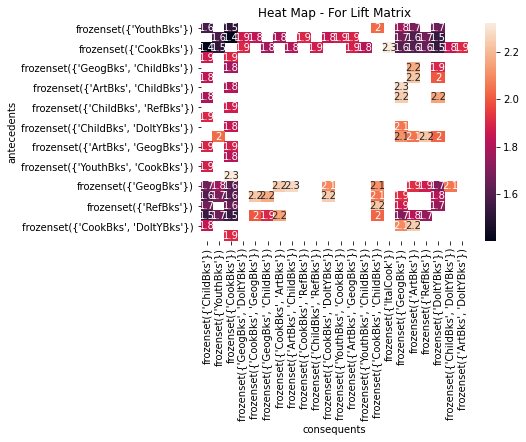

In [18]:
sns.heatmap(l,annot = True)
plt.title('Heat Map - For Lift Matrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [19]:
# Scatter plot for the associatioin rules with their confidence vs support

Text(0.5, 1.0, 'support vs confidence')

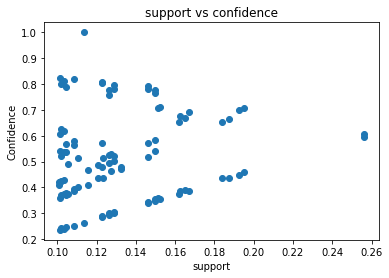

In [20]:
sup=r['support']
con=r['confidence']
plt.scatter(sup,con)
plt.xlabel('support')
plt.ylabel('Confidence')
plt.title('support vs confidence')

## Association rules with support=0.16 and threshold=0.9 for whole dataset

In [21]:
book_itemsets2 = apriori(book, min_support=0.16, use_colnames=True)
book_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [22]:
rules2 = association_rules(book_itemsets2, metric="lift", min_threshold=0.9)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
7,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
8,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
9,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211


In [23]:
r2=rules2[rules2.lift>1]
r2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
7,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
8,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
9,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211


## For book dataset with 1000 datapoints with support=0.15 and thershold=0.95

In [24]:
book2=book[:100]
book2

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,0,0,0,0,0,0,0,0,0
96,1,1,0,0,0,0,0,0,0,0,0
97,1,0,1,0,0,0,1,1,0,0,0
98,1,1,1,1,0,0,1,0,0,0,0


In [25]:
book_itemsets3 = apriori(book2, min_support=0.15, use_colnames=True)
book_itemsets3

,support,itemsets
0,0.48,(ChildBks)
1,0.25,(YouthBks)
2,0.47,(CookBks)
3,0.29,(DoItYBks)
4,0.16,(RefBks)
5,0.23,(ArtBks)
6,0.34,(GeogBks)
7,0.18,"(YouthBks, ChildBks)"
8,0.29,"(CookBks, ChildBks)"
9,0.18,"(ChildBks, DoItYBks)"


In [26]:

rules3 = association_rules(book_itemsets3, metric="lift", min_threshold=0.95)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.25,0.48,0.18,0.720000,1.500000,0.0600,1.857143
1,(ChildBks),(YouthBks),0.48,0.25,0.18,0.375000,1.500000,0.0600,1.200000
2,(CookBks),(ChildBks),0.47,0.48,0.29,0.617021,1.285461,0.0644,1.357778
3,(ChildBks),(CookBks),0.48,0.47,0.29,0.604167,1.285461,0.0644,1.338947
4,(ChildBks),(DoItYBks),0.48,0.29,0.18,0.375000,1.293103,0.0408,1.136000
5,(DoItYBks),(ChildBks),0.29,0.48,0.18,0.620690,1.293103,0.0408,1.370909
6,(ArtBks),(ChildBks),0.23,0.48,0.19,0.826087,1.721014,0.0796,2.990000
7,(ChildBks),(ArtBks),0.48,0.23,0.19,0.395833,1.721014,0.0796,1.274483
8,(GeogBks),(ChildBks),0.34,0.48,0.25,0.735294,1.531863,0.0868,1.964444
9,(ChildBks),(GeogBks),0.48,0.34,0.25,0.520833,1.531863,0.0868,1.377391


In [27]:
r3=rules3[rules3.lift>1]
r3


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.25,0.48,0.18,0.720000,1.500000,0.0600,1.857143
1,(ChildBks),(YouthBks),0.48,0.25,0.18,0.375000,1.500000,0.0600,1.200000
2,(CookBks),(ChildBks),0.47,0.48,0.29,0.617021,1.285461,0.0644,1.357778
3,(ChildBks),(CookBks),0.48,0.47,0.29,0.604167,1.285461,0.0644,1.338947
4,(ChildBks),(DoItYBks),0.48,0.29,0.18,0.375000,1.293103,0.0408,1.136000
5,(DoItYBks),(ChildBks),0.29,0.48,0.18,0.620690,1.293103,0.0408,1.370909
6,(ArtBks),(ChildBks),0.23,0.48,0.19,0.826087,1.721014,0.0796,2.990000
7,(ChildBks),(ArtBks),0.48,0.23,0.19,0.395833,1.721014,0.0796,1.274483
8,(GeogBks),(ChildBks),0.34,0.48,0.25,0.735294,1.531863,0.0868,1.964444
9,(ChildBks),(GeogBks),0.48,0.34,0.25,0.520833,1.531863,0.0868,1.377391


In [28]:
l1=r3.pivot('antecedents','consequents','lift')
l1.head()

consequents,(ChildBks),(YouthBks),(CookBks),(DoItYBks),(ArtBks),(GeogBks),"(ChildBks, DoItYBks)","(CookBks, DoItYBks)","(CookBks, ChildBks)","(GeogBks, ChildBks)","(CookBks, GeogBks)"
antecedents,,,,,,,,,,,
(YouthBks),1.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(ChildBks),NaN,1.5,1.285461,1.293103,1.721014,1.531863,NaN,1.5625,NaN,NaN,1.5625
(CookBks),1.285461,NaN,NaN,1.467351,1.480111,1.752190,1.77305,NaN,NaN,1.787234,NaN
(DoItYBks),1.293103,NaN,1.467351,NaN,NaN,1.521298,NaN,NaN,1.783591,NaN,NaN
(ArtBks),1.721014,NaN,1.480111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 <a list of 22 Text major ticklabel objects>)

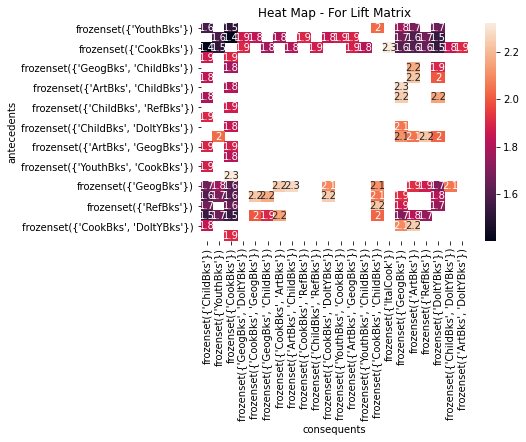

In [29]:
sns.heatmap(l,annot = True)
plt.title('Heat Map - For Lift Matrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)